## Welcome to the next-to-last practical

This tutorial will show you how to get the computer to distinguish data between classes. There are many methods to classify data, but these can be summarised into (1) basic statistical methods; (2) machine learning; and (3) deep learning.

We will continue with the rooibos data. Given the small size of this dataset, this notebook will focus on developing basic statistical methods for classifying tea samples into fermented and nonfermented. We will also estimate the accuracy of classification methods.  When estimating accuracy, it is important also to determine how exact this estimate is--so we will also show how to compute the standard deviation of the accuracy estimate using the so-called jackknife. 

---

### Overview of the classification problem  in general

The following picture demonstrates the simple idea behind computational classification of objects. The general procedure is:
* Extract features from data;
* Pass the features into a model;
* The model outputs a determination of the sample's class.

To make this work, the programmer must:
* Determine informative features to be used;
* Develop a model that can effectively make use of the features extracted;
* Evaluate the accuracy of the overall system

In this tutorial we are classifying tea samples, and the  features we will be using are the TPC, TEAC, and FRAP measurements obtained from chemical assays.

<img src="pics/cat.png" width="700" height="300">



### Binary classification

* two classes, distinguish between "null" and "positive"
* In this case when distinguishing there are two possible errors: false positive or false negative
  * **[False positive](https://www.statisticshowto.com/false-positive-definition-and-examples/)**: Is where you receive a positive result for a test, when you should have received a negative results, it occurs when a cancer screening test comes back positive, but you don’t have the disease.
  * **[False negative](https://www.statisticshowto.com/false-positive-definition-and-examples/)**: Is where a negative test result is wrong. like In the Justice System, a false negative occurs when a guilty suspect is found “Not Guilty” and allowed to walk free.
* These two work against each other.  Decreasing the false positive rate tends to increase the false negative rate.
    * false positive rate: What proportion of positive identifications was actually correct?
    * false negative rate: What proportion of actual positives was identified correctly?
* **[False positive rate](https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall)** is related to specificity  and precision
* **[False negative rate](https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall)** is related to recall and sensitivity
#### Threshold
Usually binary classification is based on a single quantity calculated from the features of the data sample. If this quantity exceeds a threshold (which is set by the programmer) then the sample is judged to be in one class, and if not the sample is put in the other class.

Related concepts include accuracy, F1 score (will discuss later)

<img src="pics/preVSrec.svg" width="700" height="200">



---

[**Exercise 1:**](https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall) Consider a classification model that separates email into two categories: "spam" or "not spam." If you raise the classification threshold, what will happen to precision?, what about recall


---

#### Method 1: Receiver operating characteristic [(ROC)](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) curves

Receiver operating characteristic (ROC) curves are used to determine thresholds based on the trade-off between false positive error and false negative error. The ROC curve tells you what false positive rate to expect for a given false negative rate.

Before we get started, we need to repeat the setup code from the previous notebook.
_ put necessary setup code from previous notebook here_

Our example will use code the python packages matplotlib, numpy, and sklearn.  In addition, we will make use of some pre-written programs that are located in the `source` directory. We begin by importing these packages.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from source.roc import draw_roc # python function from file 'roc' in the source directory
from source.baseline_acc import get_accuracy_base # @@ modify comment @@@ importing the baseline code from source.basline file, the baseline that is used called as "Mahalanobis distance" link "https://en.wikipedia.org/wiki/Mahalanobis_distance"
from source.calculate_jack import jack_SD # @@ modify comment @@ importing the baseline code from source.basline file
import pandas as pd

%store -r df_nf
%store -r df_fer
%store -r df

print("Shape of data frame (rows, columns) is: ", df.shape) 

Shape of data frame (rows, columns) is:  (98, 8)


First let's take a look at imported data

In [3]:
print(df.head(2))

   type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH  TPC_H2O  TEAC_H2O  FRAP_H2O cut
0     0  275.767474  2821.888864  1180.778887   314.33   2588.61    584.61  FC
1     0  253.494375  2355.706326   647.096605   331.41   2818.87    589.91  LL


---

Now let us create some arrays, that we will use later

In [7]:
feat_H2O = ['TPC_H2O', 'TEAC_H2O',  'FRAP_H2O'] # define the input (features)
feat_MEOH = ['TPC_MEOH', 'TEAC_MEOH',  'FRAP_MEOH'] # define the input (features)

y = df[['type']] # define the output (target)

Now, let us call the `draw_roc` function to draw the ROC curves using the arrays we defined above

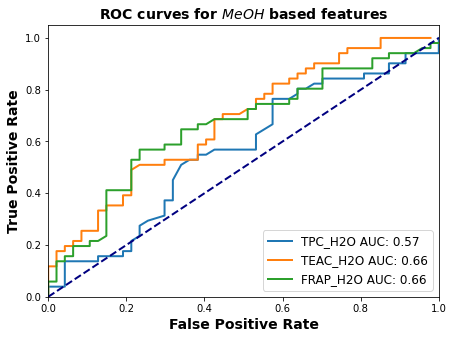

In [8]:
# ROC curves, should it be done on the entire data set, or just the training
di_h2o =[True, False, False] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df, di_h2o, feat_H2O, y)


---
**Exercise 2:** Please do the same for the MeOH extract
<br>


In [10]:
#  ___ code here ____



---

### Statistical Baseline


first let us define the target (output) into a separate dataframe

In [11]:
y = df[['type']]

Then let us define feature groups in a 2D array

In [12]:
features = [ ['TPC_H2O'], ['TEAC_H2O'],  ['FRAP_H2O'], ['TPC_H2O', 'TEAC_H2O']]

define an array of good splits, I am only intersted in one

In [25]:
splits = [0.4, 0.2]

define an empty dictionary

In [26]:
base_dict = {} 
# https://www.geeksforgeeks.org/python-nested-dictionary/  (for more exploration around dictionaries) 

The following code generates the results (should I hide it, or turn it into function ??)

In [27]:
for s in splits:
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    
    for f in features:
        xtr =  X_train[f]
        xte =  X_test[f]
        results = get_accuracy_base (xtr, y_train, xte, y_test, len(f)) # to get the accuarcies for the baseline
        
        key = str(s)+","+str(f)
        
        base_dict[key] = {}
        base_dict[key]['tot_acc'] = results[0]
        base_dict[key]['jack_train'] = results[1]
        base_dict[key]['jack_test'] = results[2]
        # print(base_dict)
        # print()

In [28]:
%store base_dict 
# we will use this Dictionary in the next notebook

Stored 'base_dict' (dict)


playing around with dictionaries 

In [29]:
print(base_dict.keys())
key = list(base_dict.keys())[0]
print( base_dict[key].keys() )

dict_keys(["0.4,['TPC_H2O']", "0.4,['TEAC_H2O']", "0.4,['FRAP_H2O']", "0.4,['TPC_H2O', 'TEAC_H2O']", "0.2,['TPC_H2O']", "0.2,['TEAC_H2O']", "0.2,['FRAP_H2O']", "0.2,['TPC_H2O', 'TEAC_H2O']"])
dict_keys(['tot_acc', 'jack_train', 'jack_test'])


now let us graph the accuracy with the SD (should I turn it into a function)

In [30]:
acc_arr = [] 
sd_arr = [] 


for key in base_dict.keys():
    
    print( str(key)+": "+str(base_dict[key][ 'tot_acc' ] ))
    acc_arr.append(base_dict[key][ 'tot_acc' ]) # append total accuarcy to an array
    sd_train = jack_SD( np.zeros( len(base_dict[key][ 'jack_train' ]) ), base_dict[key][ 'jack_train' ])[0]
    sd_test = jack_SD( np.zeros( len(base_dict[key][ 'jack_test' ]) ), base_dict[key][ 'jack_test' ])[0]
    sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
    sd_arr.append(sd) # append sd_arr to an array

    print(sd)
    print()
    


0.4,['TPC_H2O']: 0.55
0.08996396844211696

0.4,['TEAC_H2O']: 0.675
0.13291317134775255

0.4,['FRAP_H2O']: 0.75
0.3032381727198833

0.4,['TPC_H2O', 'TEAC_H2O']: 0.85
0.05717718748968661

0.2,['TPC_H2O']: 0.5
0.26668904971981533

0.2,['TEAC_H2O']: 0.7
0.10513149660756924

0.2,['FRAP_H2O']: 0.7
0.2379385671900674

0.2,['TPC_H2O', 'TEAC_H2O']: 0.8
0.0917662935482246



<ErrorbarContainer object of 3 artists>

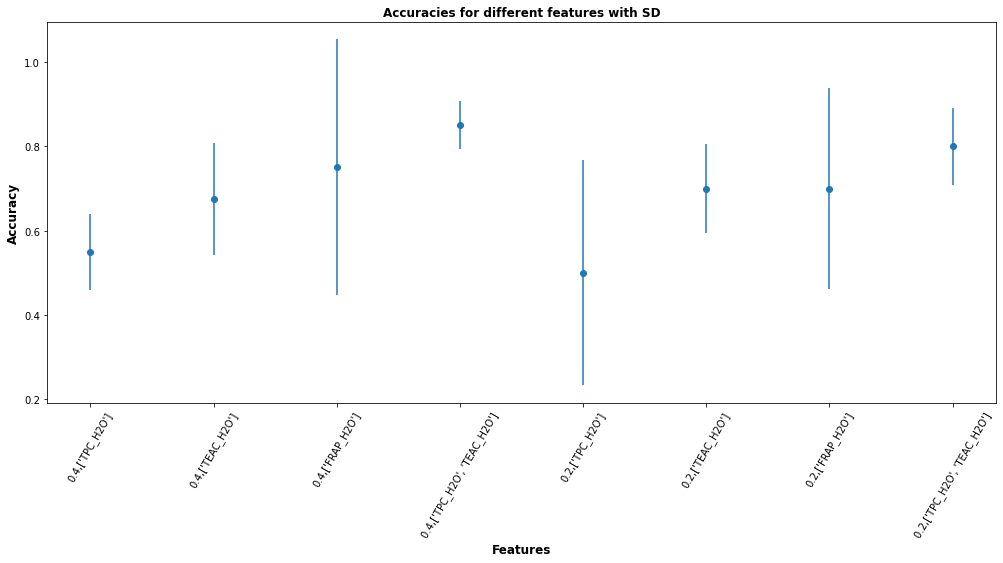

In [40]:
plt.figure(figsize=(17 , 7))
plt.title( "Accuracies for different features with SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Accuracy", fontweight ='bold', fontsize =12)
plt.errorbar( list(base_dict.keys()), acc_arr, sd_arr, fmt='o')


### Now try to add more features, and try with methanol

In [21]:
# ----- code here ------------

### Now try to mix both methanol and water extracts

In [22]:
# ----- code here ------------

### now draw a conclusion
- hint: usually it be the highest accuracy with the lowest SD will be the best method